# Modelo de Aprendizaje automático

In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import pathlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Lectura de data

In [60]:
datos = sns.load_dataset('penguins')

In [5]:
datos

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [62]:
traduccion = {
    'species': 'especie',
    'island': 'isla',
    'bill_length_mm': 'longitud_del_pico_mm',
    'bill_depth_mm': 'profundidad_del_pico_mm',
    'flipper_length_mm': 'longitud_de_la_aleta_mm',
    'body_mass_g': 'masa_corporal_g',
    'sex': 'sexo'
}

df = datos.rename(columns=traduccion)
df.head()

,especie,isla,longitud_del_pico_mm,profundidad_del_pico_mm,longitud_de_la_aleta_mm,masa_corporal_g,sexo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [76]:
df.isnull().sum()

especie                    0
isla                       0
longitud_del_pico_mm       2
profundidad_del_pico_mm    2
longitud_de_la_aleta_mm    2
masa_corporal_g            2
sexo                       0
dtype: int64

In [77]:
df.dropna(inplace=True)
df.reset_index(inplace=True,drop=True)
df

,especie,isla,longitud_del_pico_mm,profundidad_del_pico_mm,longitud_de_la_aleta_mm,masa_corporal_g,sexo
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
3,0,2,36.7,19.3,193.0,3450.0,0
4,0,2,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
337,2,0,47.2,13.7,214.0,4925.0,0
338,2,0,46.8,14.3,215.0,4850.0,0
339,2,0,50.4,15.7,222.0,5750.0,1
340,2,0,45.2,14.8,212.0,5200.0,0


In [66]:
df.columns

Index(['especie', 'isla', 'longitud_del_pico_mm', 'profundidad_del_pico_mm',
       'longitud_de_la_aleta_mm', 'masa_corporal_g', 'sexo'],
      dtype='object')

Preprocesamiento de datos, encodificados para el modelo de aprendizaje automatico

In [68]:
df['especie'] = df['especie'].astype('category').cat.codes
df['isla'] = df['isla'].astype('category').cat.codes
df['sexo'] = df['sexo'].astype('category').cat.codes

df.head()

,especie,isla,longitud_del_pico_mm,profundidad_del_pico_mm,longitud_de_la_aleta_mm,masa_corporal_g,sexo
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
3,0,2,NaN,NaN,NaN,NaN,-1
4,0,2,36.7,19.3,193.0,3450.0,0


#### Visualizo los datos para creando un gráfico Pairplot y un mapa de calor de correlación
- En la diagonal de la gráfica de pairlot se pueden observar las distribiuciones de valores por especie de cada acaracterística, en el resto, se puede comparar la especie con dos características.
- El mapa de calor muestra la correlación entre variables. Por ejemplo existe una alta relación entre la longitud de la aleta y a especie, y la longitus de la aleta y la masa corporal.


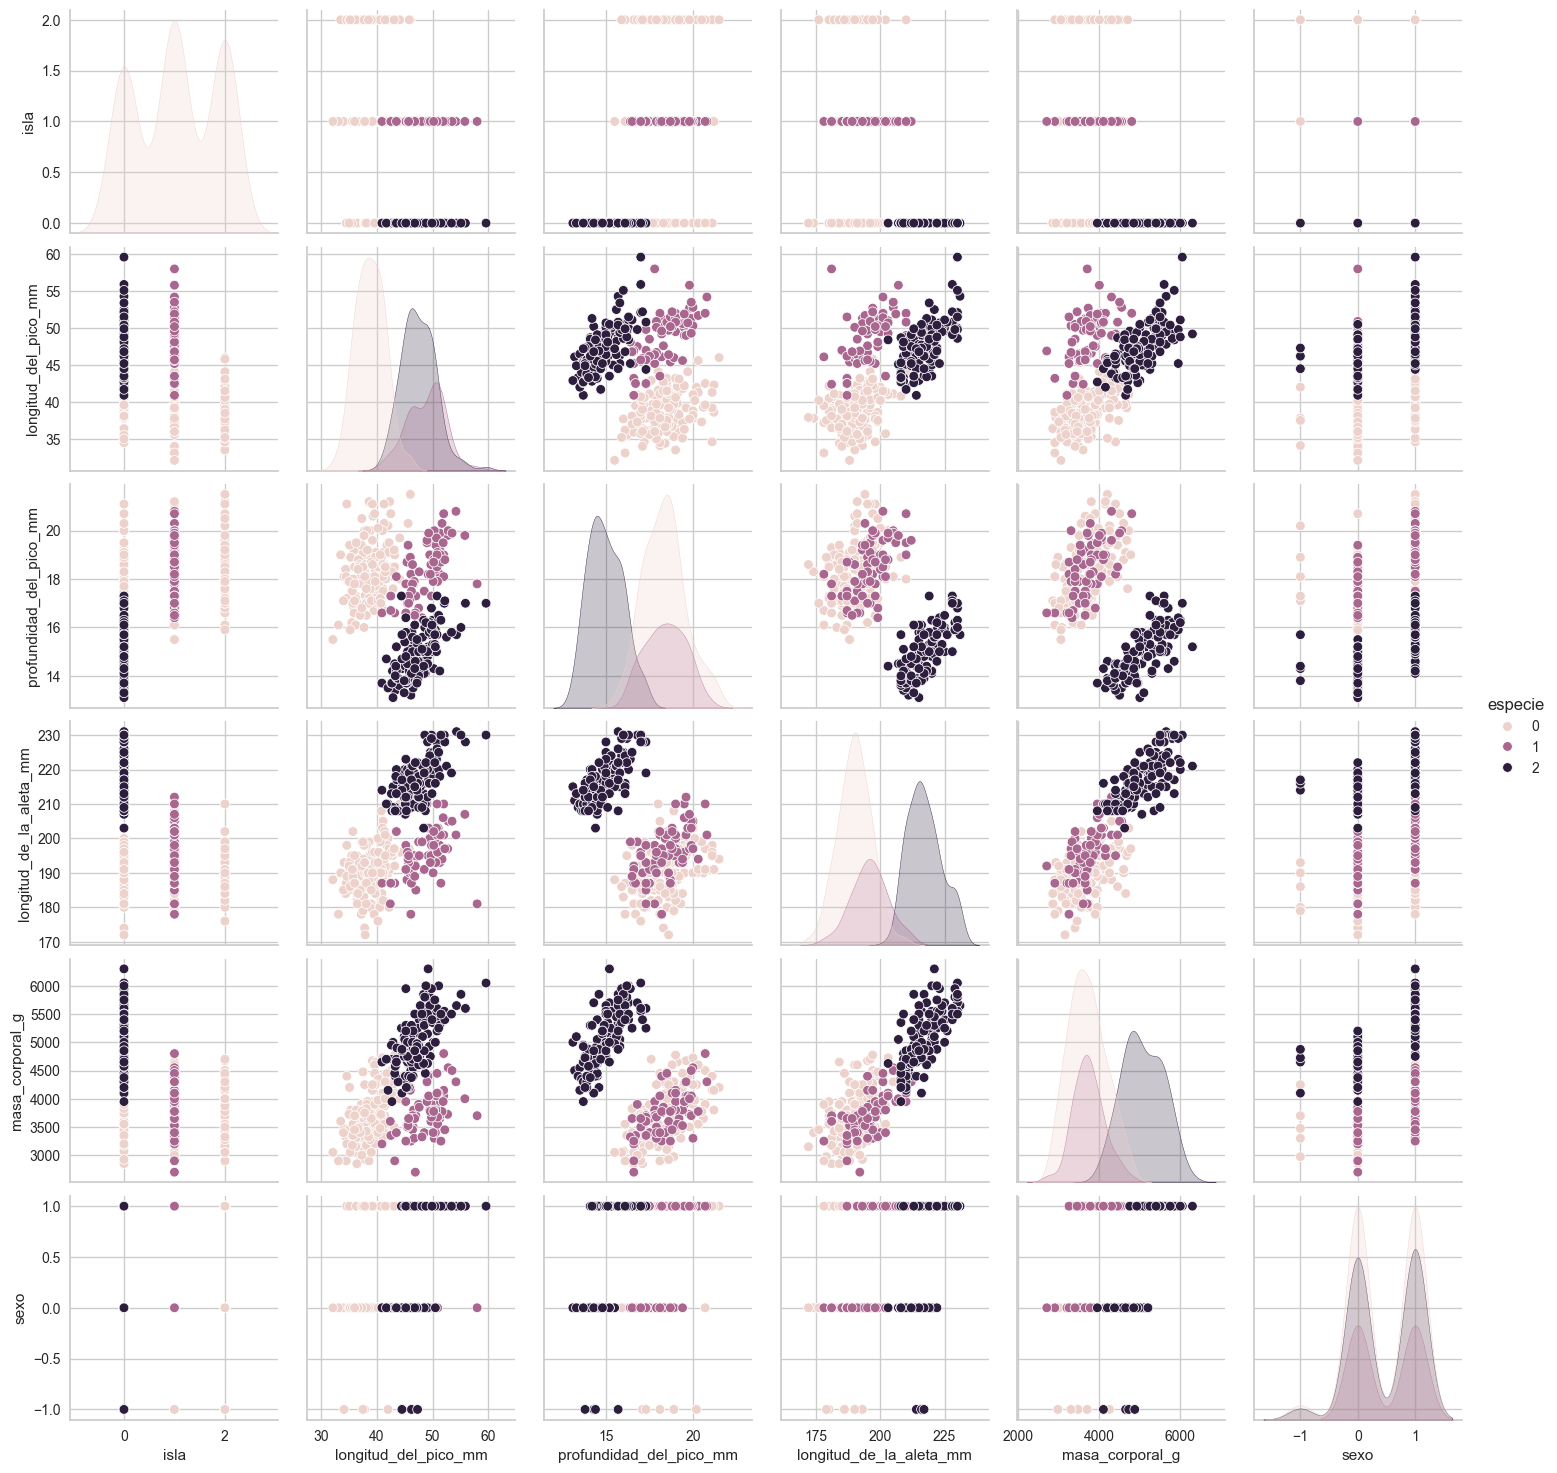

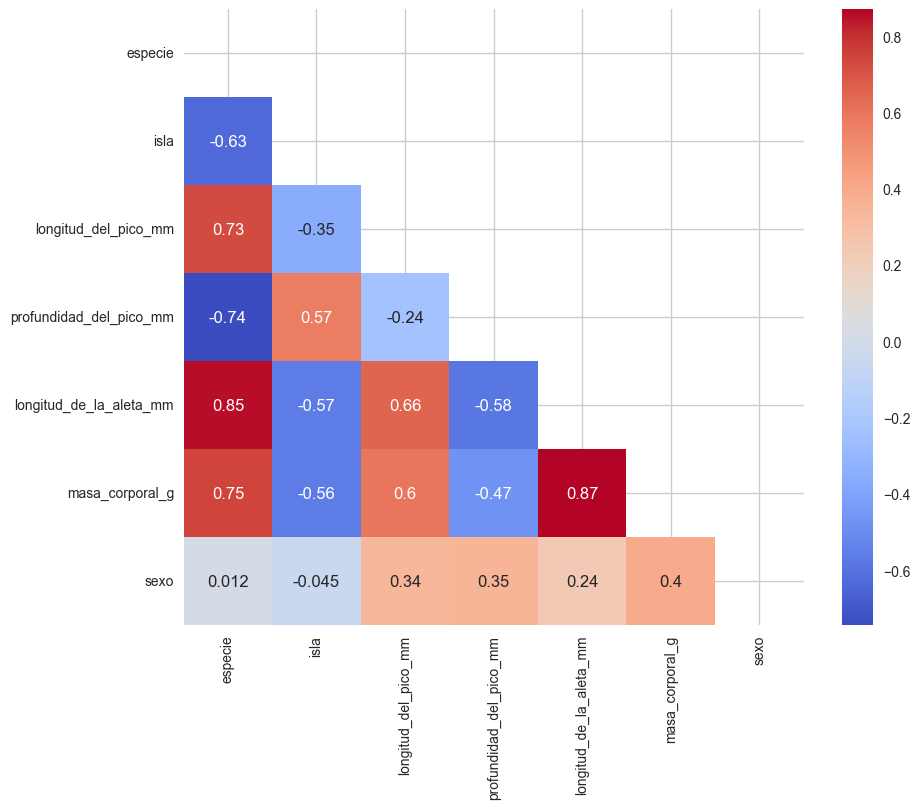

In [119]:
sns.pairplot(df, hue='especie')
plt.show()


corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=mask)
plt.show()


### Voy a utilizar una regresión logística apara predecir las características de las especies, utilizando la variable 'especie' como variable objetivo
Ya que existen correlaciones significativas para muchas características, las incluyo todas.
Preparo los datos, divido el conjunto de datos entre entrenamiento 80% y prueba 20%, creo y entreno el modelo con un número máximo de iteraciones de 1000 

Exactitud: 1.00

Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        22

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



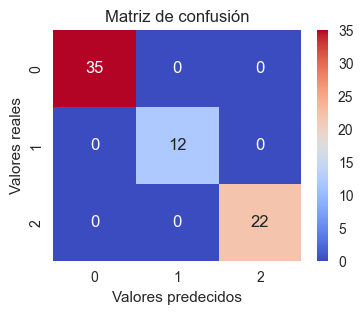

In [92]:
X = df.drop('especie', axis=1)
y = df['especie']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


y_pred_log_reg = log_reg.predict(X_test)


accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
report_log_reg = classification_report(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)


print(f"Exactitud: {accuracy_log_reg:.2f}")
print("\nReporte de clasificación:\n", report_log_reg)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='coolwarm', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Valores predecidos')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')
plt.show()


- La exactitud mide qué tan bien el modelo acierta en sus predicciones, comparando los aciertos con el total de intentos. Siendo la exactitud 1, el modelo ha acertado en todo: no se equivocó ni una sola vez con los datos que probó.

- El reporte de clasificación muestra distintas métricas de precisión, exhaustividad, F1 es una mezcla de ambos. Dependiendo el objetivo seleccionaremos la más valiosa.
- El último gráfico es la matriz de confusión: Las filas son las especies reales de los pingüinos, y las columnas son las especies que el modelo predijo. Por ejemplo, el modelo predijo correctamente 35 pingüinos de la especie 0, 12 de la especie 1 y 22 de la especie 2. No hubo errores, ya que no hay números fuera de la diagonal principal, lo que indica que el modelo es muy preciso.

#### Ejemplo de predicción con este modelo de regresión logística
En el siguiente código, agrego características de dos pingüinos, el modelo predice de que especie se trata

In [117]:

ejemplo = pd.DataFrame({
    'longitud_del_pico_mm': [45.0, 20.0], 
    'profundidad_del_pico_mm': [15.0, 14.5],  
    'longitud_de_la_aleta_mm': [210.0, 220.0], 
    'masa_corporal_g': [4500.0, 5000.0], 
    'isla': [0, 1],                  
    'sexo': [0, 1]                     
})


columnas_originales = X.columns.tolist()
ejemplo = ejemplo[columnas_originales]

# Realizar predicciones con el modelo de regresión logística
prediccion = log_reg.predict(ejemplo)

# Mapear las predicciones a los nombres de las especies
species_mapping = {0: 'Adelie', 1: 'Chinstrap', 2: 'Gentoo'}  # Ajusta este diccionario según tu mapeo original
prediccion_map = [species_mapping[pred] for pred in prediccion]

# Imprimir las predicciones de manera legible
for i, especie in enumerate(prediccion_map):
    print(f"Pingüino {i+1}: {especie}")

Pingüino 1: Gentoo
Pingüino 2: Adelie
